
We import libraries like `sqlite3` for database operations, `pandas` for data handling, and `matplotlib.pyplot` for visualizing the results.


In [ ]:
pip install pandas matplotlib



We connect to the SQLite database `sales_data.db`, and create a new table named `sales` with columns for product, quantity, price and also insert multiple rows of sales data including product name, quantity sold and price.



**Creating the database, table, and inserting sample data.**

In [ ]:
import sqlite3

# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the 'sales' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ('Coffee', 10, 2.5),
    ('Tea', 5, 1.5),
    ('Juice', 8, 3.0),
    ('Coffee', 6, 2.5),
    ('Tea', 4, 1.5),
    ('Juice', 7, 3.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("Database and table created, sample data inserted.")


Database and table created, sample data inserted.



We run a SQL query to calculate the total quantity sold and total revenue (quantity × price) for each product.

**Run SQL query and show table using pandas**

In [ ]:
import sqlite3
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query to get total quantity and revenue by product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load the result into a pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Display the DataFrame
print(df)
df


  product  total_qty  revenue
0  Coffee         32     80.0
1   Juice         30     90.0
2     Tea         18     27.0


,product,total_qty,revenue
0,Coffee,32,80.0
1,Juice,30,90.0
2,Tea,18,27.0



We create a bar chart to show which product generated the most revenue.

**Visualize with matplotlib**

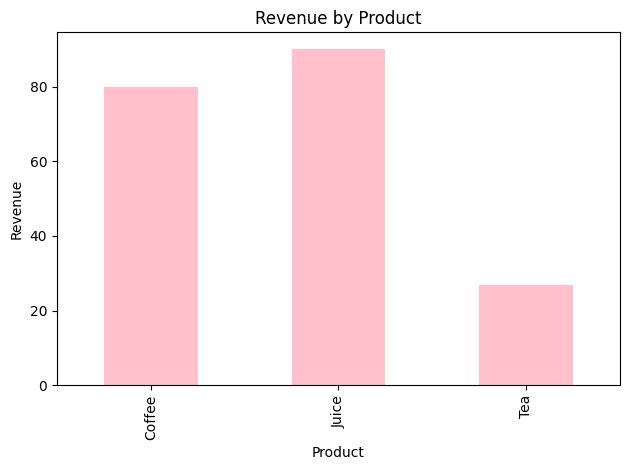

In [8]:
import matplotlib.pyplot as plt

# Create bar chart of revenue by product
df.plot(kind='bar', x='product', y='revenue', color='pink', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Saves chart to file
plt.show()


Now,we are adding sale_date column and inserting new datas.


 **Add a sale_date column and insert new data with dates**

In [9]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop old table if exists (just to refresh everything)
cursor.execute("DROP TABLE IF EXISTS sales")

# Recreate the sales table with a sale_date column
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
""")

# Sample data with dates (format: YYYY-MM-DD)
sample_data = [
    ('Coffee', 10, 2.5, '2025-01-15'),
    ('Tea', 5, 1.5, '2025-01-20'),
    ('Juice', 8, 3.0, '2025-02-10'),
    ('Coffee', 6, 2.5, '2025-02-15'),
    ('Tea', 4, 1.5, '2025-03-01'),
    ('Juice', 7, 3.0, '2025-03-05'),
    ('Coffee', 5, 2.5, '2025-03-20'),
    ('Juice', 6, 3.0, '2025-04-02'),
    ('Tea', 3, 1.5, '2025-04-10')
]

# Insert into table
cursor.executemany("INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("New data with dates inserted.")


New data with dates inserted.


Connecting a database


 **Query monthly revenue**

In [10]:
import pandas as pd
import sqlite3

# Reconnect to the database
conn = sqlite3.connect("sales_data.db")

# Query: Revenue by month
query = """
SELECT
    strftime('%Y-%m', sale_date) AS month,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY month
ORDER BY month
"""

# Load into pandas
df_monthly = pd.read_sql_query(query, conn)
conn.close()

# Show the DataFrame
print(df_monthly)
df_monthly


     month  total_revenue
0  2025-01           32.5
1  2025-02           39.0
2  2025-03           39.5
3  2025-04           22.5


,month,total_revenue
0,2025-01,32.5
1,2025-02,39.0
2,2025-03,39.5
3,2025-04,22.5



We extract the month from the sale date and calculate the total revenue per month to observe sales trends over time.We plot a line chart to visualize how total revenue changes over different months.


**Line chart of monthly revenue**

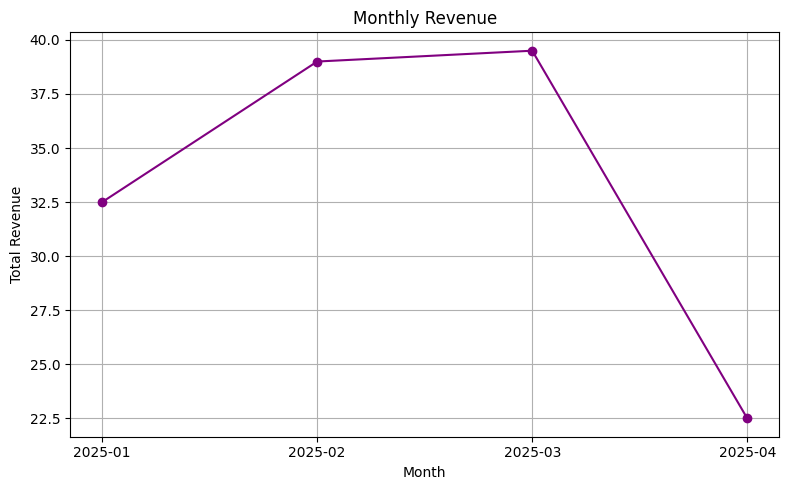

In [11]:
import matplotlib.pyplot as plt

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(df_monthly['month'], df_monthly['total_revenue'], marker='o', color='purple')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_revenue.png")
plt.show()
